In [28]:
import pandas as pd
import sys
import os

notebook_dir = os.path.abspath('')

scripts_dir = os.path.join(os.path.dirname(notebook_dir), 'scripts')
sys.path.append(scripts_dir)

# 引入先前寫過判斷打席結果與方向的函式
from categorize_at_bat_result import categorize_at_bat_result
# 引入 25 宮格的轉換函式
from map_to_25_grid import map_to_25_grid
# 引入 25 宮格欄位轉換為圖形的座標
from grid_map_to_25_coordinates import grid_map_to_25_coordinates

# 引入已清理過的逐球記錄
cleaned_labled_file_path = '../labeled/jose_ramos_pitches_df_cleaned.csv'

pitches_df = pd.read_csv(cleaned_labled_file_path)

print("DataFrame Shape:", pitches_df.shape)


DataFrame Shape: (93, 27)


## 本壘板紀律
幾好幾壞

對於不同位置的 O-Swing%

In [29]:
# O-Swing Rate
pitches_outside_zone = pitches_df[pitches_df['is_obvious_off_zone'] == True]

swings_outside_zone = pitches_outside_zone[pitches_outside_zone['has_swing'] == True]

print(f"total o swings: {swings_outside_zone.shape[0]}")

swings_outside_zone_count = swings_outside_zone.shape[0]

total_pitches_outside_zone = pitches_outside_zone.shape[0]

o_swing_rate = swings_outside_zone_count / total_pitches_outside_zone if total_pitches_outside_zone > 0 else 0

print(f"O-Swing Rate: {o_swing_rate * 100:.2f}%")


total o swings: 10
O-Swing Rate: 31.25%


In [30]:
ball_counts_grouped = swings_outside_zone.groupby(
    ['strike_count', 'ball_count']).size().reset_index(name='swing_events')

pitches_outside_zone_grouped = pitches_outside_zone.groupby(
    ['strike_count', 'ball_count']).size().reset_index(name='total_pitches_outside_zone')

merged_counts_swing_off_zone = ball_counts_grouped.merge(
    pitches_outside_zone_grouped, on=['strike_count', 'ball_count'])

merged_counts_swing_off_zone['o_swing_rate'] = merged_counts_swing_off_zone['swing_events'] / \
    merged_counts_swing_off_zone['total_pitches_outside_zone']

merged_counts_swing_off_zone['o_swing_rate_pct'] = merged_counts_swing_off_zone['o_swing_rate'] * 100


merged_counts_swing_off_zone


,strike_count,ball_count,swing_events,total_pitches_outside_zone,o_swing_rate,o_swing_rate_pct
0,0,0,1,5,0.200000,20.000000
1,0,1,1,1,1.000000,100.000000
2,1,0,1,4,0.250000,25.000000
3,1,2,1,2,0.500000,50.000000
4,2,0,1,4,0.250000,25.000000
5,2,1,4,6,0.666667,66.666667
6,2,3,1,2,0.500000,50.000000


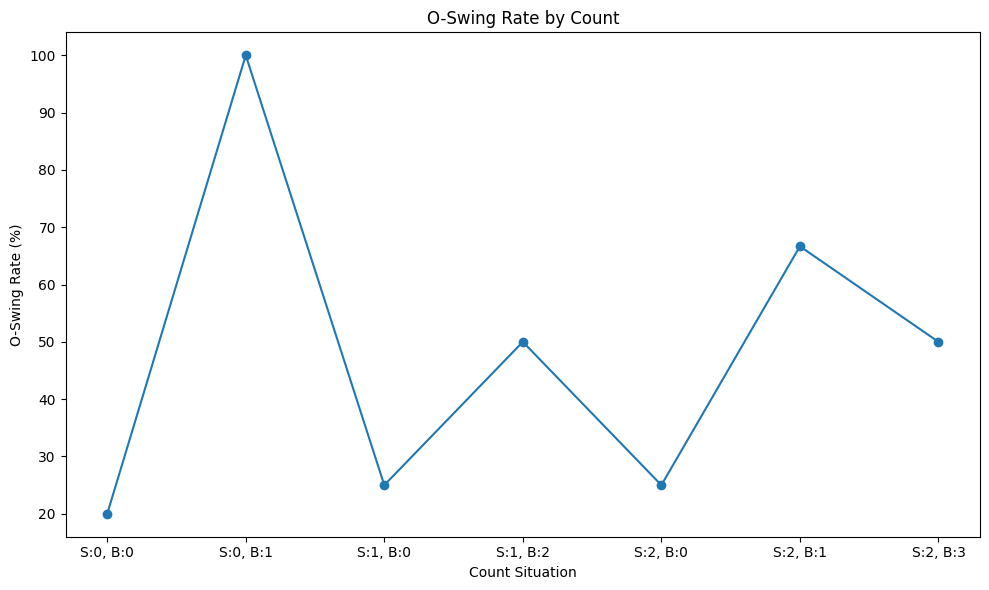

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# merged_counts_swing_off_zone_df = pd.DataFrame(merged_counts_swing_off_zone)

plt.figure(figsize=(10, 6))


count_situations = [f"S:{int(row['strike_count'])}, B:{int(row['ball_count'])}" for _, row in merged_counts_swing_off_zone.iterrows()]
x_positions = np.arange(len(count_situations))

plt.plot(x_positions, merged_counts_swing_off_zone['o_swing_rate'] * 100, marker='o', linestyle='-')

plt.title('O-Swing Rate by Count')
plt.xlabel('Count Situation')
plt.ylabel('O-Swing Rate (%)')
plt.xticks(x_positions, labels=count_situations)
plt.tight_layout()
plt.show()

### 樣本數太少
 0 好 1 壞的情形